# Project: Movies Dataset

## Files to review:
- You can review the file called **```Assessing Data```** where I analyzed the dataset we are going to work with.
- I also did some data cleansing in the file called **```Data Cleansing```**
- In this notebook, we're going to answer some questions using visuals and descriptive statistics

## Questions to Answer:
In this part I will write any question I want to answer, so I don't forget.
- [x] Highest revenue per year, and from which movie
- [x] What's the genre that generated more revenue and which one is the genre that has the best votes.
- [x] Average Revenue per Genre from 1960-2015
- [x] Correlations between Revenue and Budget
- [x] Correlations between Budget and Popularity

## Table of Contents
<ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#q1">Question 1</a></li>
<li><a href="#q2">Question 2</a></li>
<li><a href="#q3">Question 3</a></li>
<li><a href="#q4">Question 4</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I think movies is a topic we all like and feel familiar with and that's why I chose to work with this dataset. In the following sections **I'll be analyzing each of the questions stated above to understand more about this dataset and about the movie industry.**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='eda'></a>
## Exploratory Data Analysis


> With the goal of addressing the research questions I used descriptive statistics to find insights and relationships between variables. 

<a id='q1'></a>
> ### Question 1: Highest revenue per year, and from which movie
- The movie that made **1907.005842** Million USD Dollar in revenue is **Jaws**

In [2]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df = pd.read_csv('clean_dataset.csv')
df.head(2)

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies,cast
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action,Universal Studios,Chris Pratt
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action,Village Roadshow Pictures,Tom Hardy


In [3]:
df.drop_duplicates(subset = 'id' , inplace = True) 

In [4]:
df[df.budget_adj == 0]

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies,cast


In [5]:
sum(df.id.duplicated())

0

> ### Function for plotting
I'm going to create a function that I'm going to call everytime I want to create a plot.

In [6]:
def plotTitle(title, xlabel, ylabel):
    """
    This is a function that I will call every time I want to create a plot 
    """
    plt.title(title, fontsize = 22)
    plt.xlabel(xlabel, labelpad = 15, fontsize = 18)
    plt.ylabel(ylabel, labelpad = 15, fontsize = 18) 

> ### Analyzing Single Variables:
In my analyzis I'll be reviewing the variables:
- ```release_year```
- ```vote_average```
- ```production_companies```

In [7]:
df.release_year.describe()

count    3854.000000
mean     2001.261028
std        11.282575
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

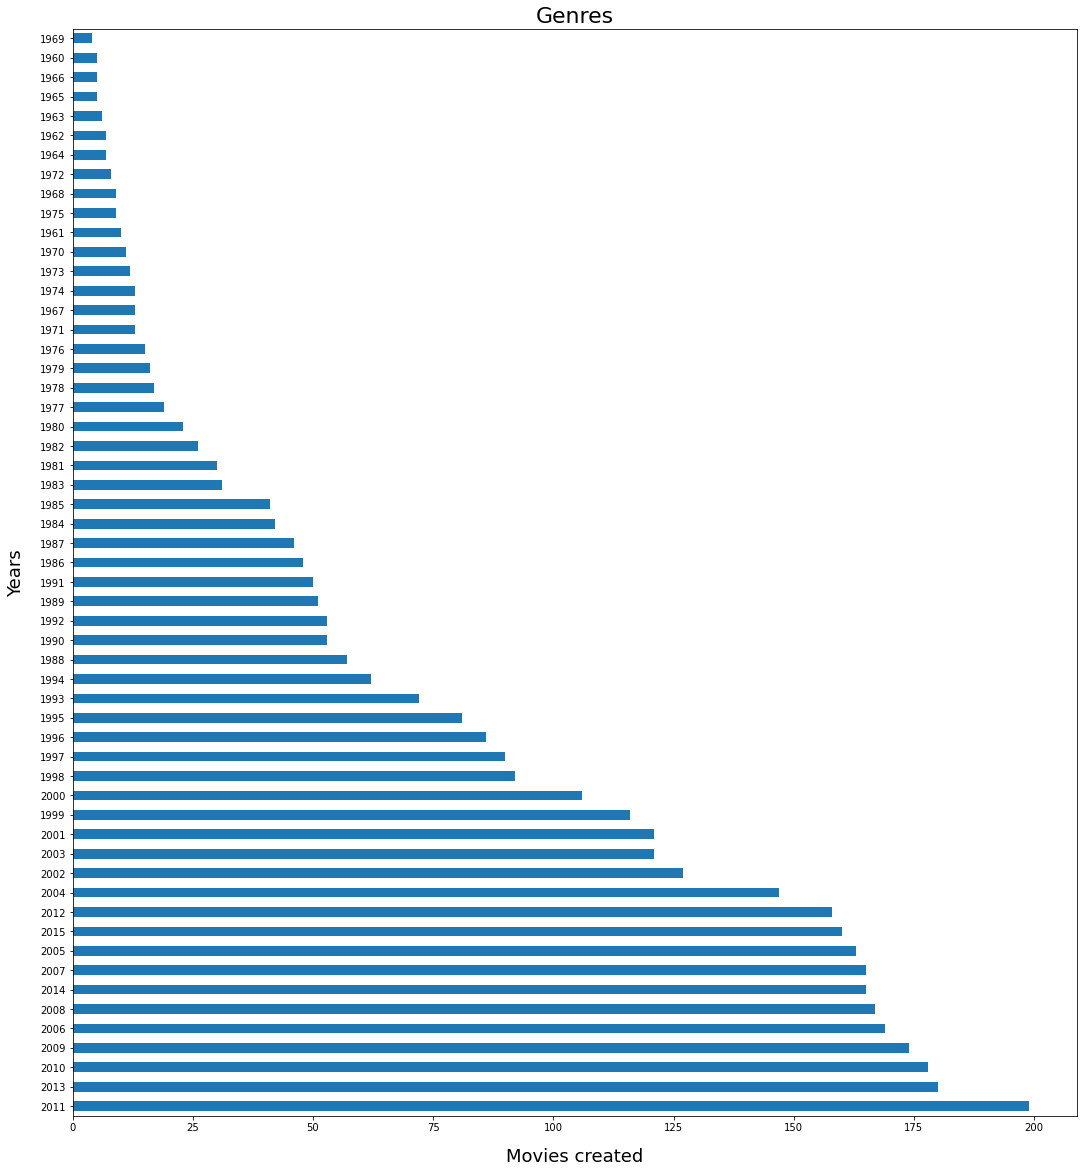

In [8]:
df['release_year'].value_counts().plot(kind = 'barh', figsize =(18,20))
plotTitle('Genres', 'Movies created', 'Years');

In our previous graph, we can appreciate that the amount of movies created were incrementing among the years

In [9]:
df.production_companies.describe()

count                   3808
unique                   894
top       Universal Pictures
freq                     283
Name: production_companies, dtype: object

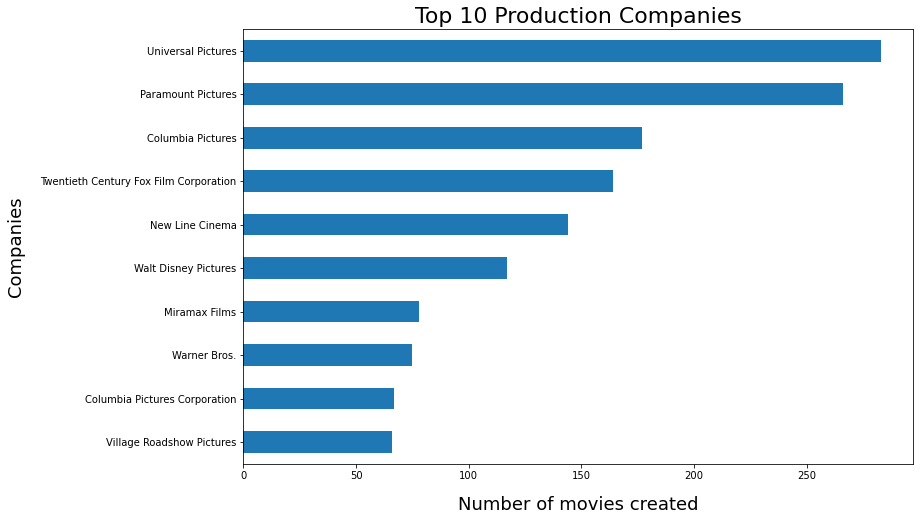

In [10]:
top10 = df['production_companies'].value_counts()
top10 = top10.nlargest(10).sort_values(ascending = True)
top10.plot(kind = 'barh', figsize =(12,8))
plotTitle('Top 10 Production Companies', 'Number of movies created', 'Companies');

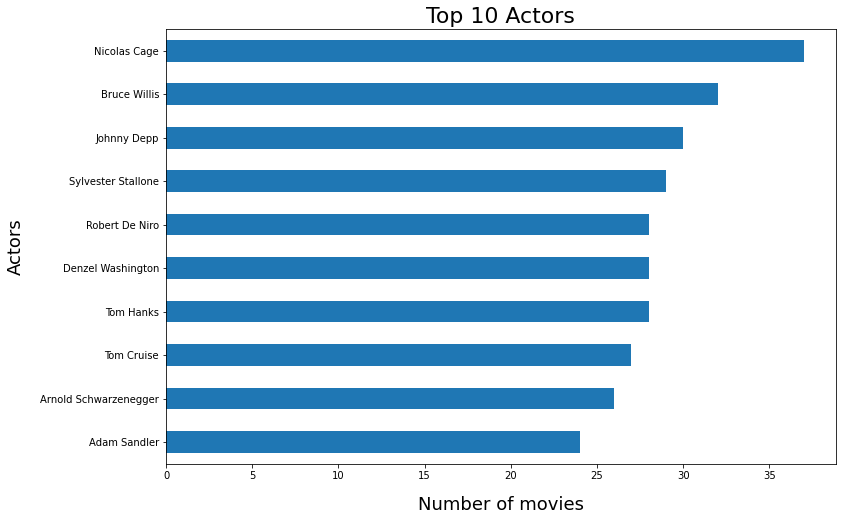

In [11]:
top10_actors = df['cast'].value_counts()
top10_actors = top10_actors.nlargest(10).sort_values(ascending = True)
top10_actors.plot(kind = 'barh', figsize =(12,8))
plotTitle('Top 10 Actors', 'Number of movies', 'Actors');

In our previous graph, we can appreciate that the quantity of votes in our dataset and the rating

In the following code, we will analyzing the popularity of the genre over the years

In [12]:
df.popularity.describe()

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462368
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

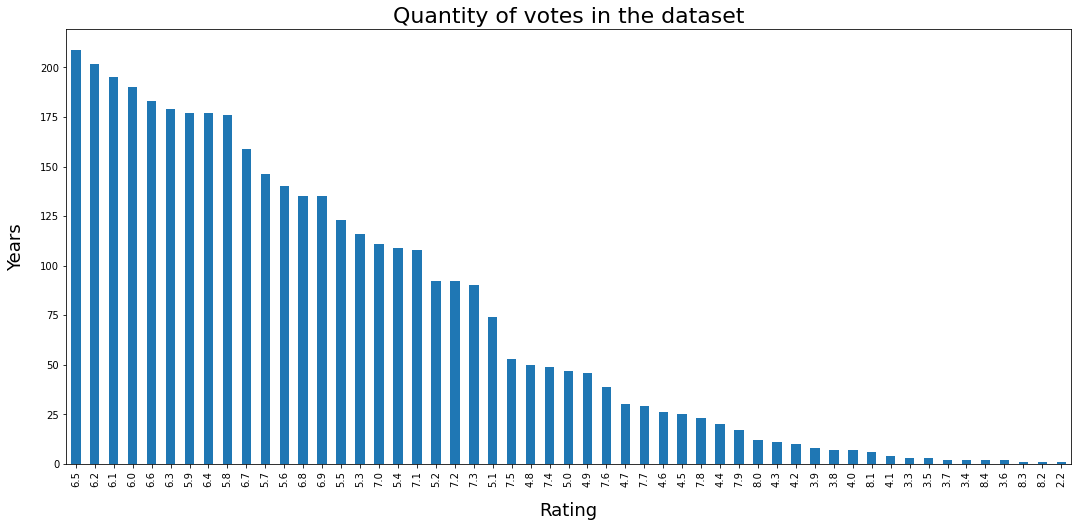

In [13]:
df['vote_average'].value_counts().plot(kind = 'bar', figsize =(18,8))
plotTitle('Quantity of votes in the dataset', 'Rating', 'Years');

#### Creation of two new columns

Before I dive deeper into the analysis, I created two new columns and changed their datatypes to integers:
- ```revenue_in_millions```: The reason for this is so that the reader can read better the numbers in the graphs.
- ```budget_in_millions```: The reason for this is so that the reader can read better the numbers in the graphs.

I also eliminated the negative ```revenue_in_USD_2010``` values, because there were so little negative values, that it was biasing my visualizations.

In [14]:
df["revenue_adj"] = df["revenue_adj"].astype(int)

In [15]:
df["budget_adj"] = df["budget_adj"].astype(int)

In [26]:
df = df.rename(columns = {'revenue_adj': 'revenue_in_USD_2010', 'budget_adj': 'budget_in_USD_2010'}, inplace = False)

In [27]:
df['revenue_in_millions'] = df['revenue_in_USD_2010']/1000000

In [28]:
df['budget_in_millions'] = df['budget_in_USD_2010']/1000000

In [19]:
df = df[(df['revenue_in_millions'] >= 0)]

In [29]:
df.head(2)

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_in_USD_2010,revenue_in_USD_2010,genres,production_companies,cast,revenue_in_millions,budget_in_millions
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,6/9/2015,5562,6.5,2015,137999939,1392445893,Action,Universal Studios,Chris Pratt,1392.445893,137.999939
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,5/13/2015,6185,7.1,2015,137999939,348161292,Action,Village Roadshow Pictures,Tom Hardy,348.161292,137.999939


#### I created a temporary dataframe with the values of:
- ```release_year```
- ```revenue_in_millions```
- ```original_title```

And then I just sorted the values from ```release_year``` and ```revenue_in_millions```. Once that I did this, I created a **line graph** to evaluate the revenue of the **best movies** from **1960-2015**.

In [20]:
temp_df = df[['release_year', 'revenue_in_millions', 'original_title']].sort_values(['release_year', 'revenue_in_millions'], ascending=False)

### Highets Revenue Per Year

In [21]:
pd.DataFrame(temp_df.groupby(['release_year']).agg({'revenue_in_millions':[max], 'original_title':['first']}))

,revenue_in_millions,original_title
,max,first
release_year,,
1960,442.378047,Spartacus
1961,1574.814740,One Hundred and One Dalmatians
1962,504.591421,Lawrence of Arabia
1963,561.773359,From Russia With Love
1964,878.080399,Goldfinger
1965,1129.534862,The Sound of Music
1966,226.643572,Who's Afraid of Virginia Woolf?
1967,1345.551059,The Jungle Book


### Revenue in Millions from 1960-2015

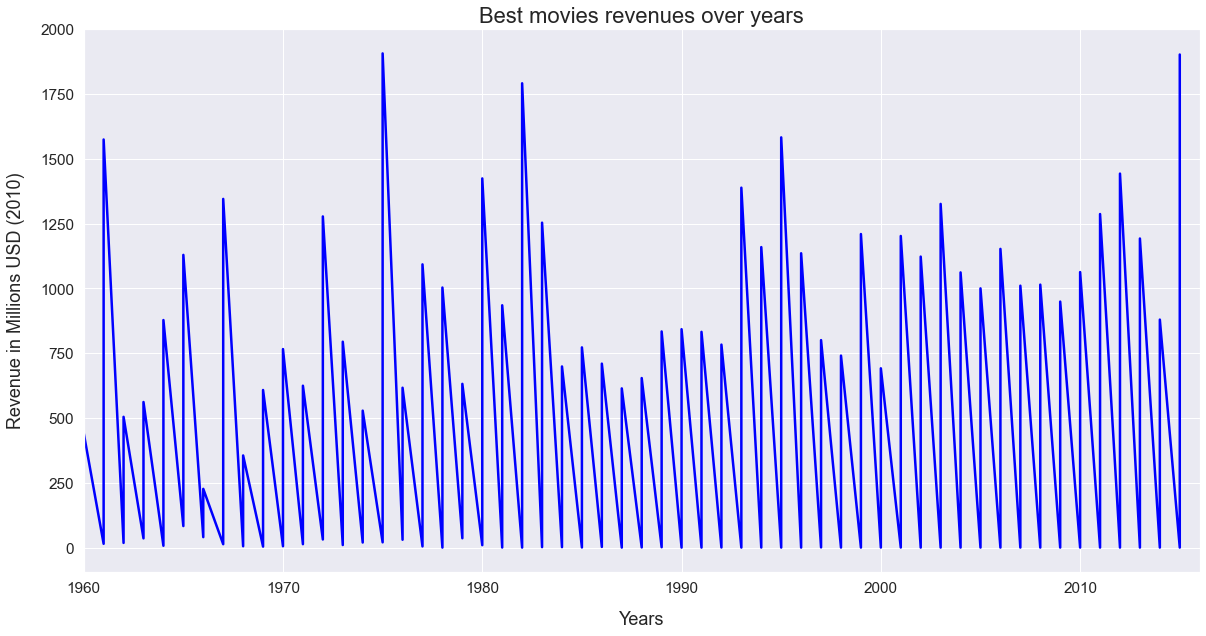

In [22]:
sns.set(font_scale=1.4)
temp_df.set_index('release_year')['revenue_in_millions'].plot(figsize=(20, 10), linewidth=2.5, color='blue', xlim = (1960, 2016))
#using the plotTitle Function that I created
plotTitle("Best movies revenues over years","Years", "Revenue in Millions USD (2010)")

### Movie that made the most money

I also wanted to review which movie has made most of the money in my dataset

In [23]:
df.loc[df['revenue_in_millions'].idxmax()]

id                                     578
popularity                         2.56319
original_title                        Jaws
director                  Steven Spielberg
runtime                                124
release_date                     6/18/1975
vote_count                            1415
vote_average                           7.3
release_year                          1975
budget_in_USD_2010                28362748
revenue_in_USD_2010             1907005842
genres                              Horror
production_companies    Universal Pictures
cast                          Roy Scheider
revenue_in_millions                1907.01
budget_in_millions                 28.3627
Name: 3543, dtype: object

### Movie that made the less money

Which movie made less money

In [24]:
df.loc[df['revenue_in_millions'].idxmin()]

id                                   13537
popularity                        0.462609
original_title             Shattered Glass
director                         Billy Ray
runtime                                 94
release_date                    11/14/2003
vote_count                              46
vote_average                           6.4
release_year                          2003
budget_in_USD_2010                 7112115
revenue_in_USD_2010                      2
genres                               Drama
production_companies      Lions Gate Films
cast                    Hayden Christensen
revenue_in_millions                  2e-06
budget_in_millions                 7.11212
Name: 1732, dtype: object

<a id='q2'></a>
### Question 2: What's the genre that has more movies and which one is the genre that has the best votes?

- To do this I created a groupby of a new column named ```value``` which has all the genres from each movie and I grouped it with the variable ```revenue_in_millions```

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
genres_revenue = df.groupby('value')["revenue_in_millions"].sum().sort_values(ascending = True)

KeyError: 'value'

In [ ]:
#Plotting the revenue for each genre
ax = genres_revenue.plot(kind = 'barh',figsize =(10,10), legend = True)
#using the plotTitle Function that I created
plotTitle("Revenue Per Genre","Genres", "Revenue in Millions USD (2010)")

### Knowing which are the most popular genres
- I'm going to review which genres do better over the years, stayinng with just the top 5 genres.

In [ ]:
genres_pop = df.groupby('value')["popularity"].sum().sort_values(ascending = False)
genres_pop

To **better understand** the data, I drop the genres that I don't want to track, I just want to see the top 8 genres.

In [ ]:
test_df = pd.read_csv('clean_dataset - Copy.csv')
def dropping():
    """
    This function will help me eliminate the genres that I don't want to analyze.
    """
    genres = ['Horror', 'Animation', 'Mystery', 'Music', 'War', 'Western', 'Documentary', 'TV Movie', 'Foreign', 'Fantasy', 'Family', 'Crime']
    for genre in genres:
        genre_over_time = test_df.drop(test_df.index[test_df['value'] == genre], inplace = True)

# calling the function dropping
dropping()

In [ ]:
genre_over_time = test_df.groupby(['release_year','value'])['popularity'].mean()
genre_over_time

In [ ]:
newdf = genre_over_time.unstack()
newdf.head(2)

In [ ]:
newdf.plot(figsize= (15,8), linewidth=3, xlim = (1960,2015), ylim = (0,4))
plotTitle("Popularity of genres change over years","Years (1960-2015)", "Average popularity")

<a id='q3'></a>
### Question 3: Average Revenue per Genre from 1960-2018

> Revenue per Genre, in order to do this I created a groupby function between ```value``` and ```revenue_in_millions```

In [ ]:
genres_avg_revenue = df.groupby('value')["revenue_in_millions"].mean().sort_values(ascending = True)

In [ ]:
ax = genres_avg_revenue.plot(kind = 'barh',figsize =(10,10), legend = True)
plotTitle("Revenue Per Genre","Revenue in Millions USD", "Genres")

<a id='q4'></a>
### Question 4: Correlations between revenue and budget

- To create this correlation, I first filter where all the values from ```revenue_in_millions``` are positive, because the negative values bias the visualization. 

In [ ]:
correlation = df[(df['revenue_in_millions'] >= 0)]
correlation.revenue_in_millions

In [ ]:
df.plot(x='budget_in_millions', y='revenue_in_millions', kind = 'scatter', figsize = (12,10), ylim = (0,2000), xlim = (0,300))
plotTitle("Correlation between a movie's Budget and its revenue","Budget (in Millions) to create a Movie", "Revenue in Millions")

### Correlation between a Movie's Budget and its Popularity

- We can see that there is a positive relationship between this 2 variables. 

In [ ]:
df.plot(x='budget_in_millions', y='popularity', kind = 'scatter', figsize = (12,10), ylim = (0,10), xlim = (0,300))
plotTitle("Correlation between a movie's Budget and its popularity" ,"Budget (in Millions) to create a Movie", "Popularity")

<a id='conclusions'></a>
## Conclusions

> - As I analyzed this dataset, I found out that the better the budget, **the better** the chances for the movie to be more popular. I think is also important to get to know how correlations works.
- I also found out that **Action**, **Adventure**, **Drama**, **Commedy** and **Thriller** are the genres that have generated the most revenue from 1965 to 2015. 
- Overall I had a lot of fun analyzing this dataset, and if the reader might have any suggestions on this work, please let me know.